In [1]:
import os
import cv2
import numpy as np
from utils import PCA, KNN
import matplotlib.pyplot as plt

In [2]:
# Preprocessing

path: str = r".\Datasets\Question-1\trainingSet\trainingSet"
images_path: str = r".\Datasets\Question-1\images.npy"
target_path: str = r".\Datasets\Question-1\target.npy"

images: list[cv2.imread] = []
target: list[str] = []

if os.path.exists(images_path) and os.path.exists(target_path):
    with open(images_path, "rb") as f1, open(target_path, "rb") as f2:
        images = np.load(f1)
        target = np.load(f2)
    print("Loaded MNIST from .npy format")

else:
    # Read the images
    for num in range(0, 10, 1):
        for file in os.listdir(directory := os.path.join(path, str(num))):
            target.append(num)
            im_path = os.path.join(directory, file)
            image = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
            image.resize((28, 28))
            images.append(image)
        print(f"Loaded {len(os.listdir(directory))} images of {num}")

    # Convert the data to numpy arrays and normalize the images
    images = np.array(images, dtype="float32") / 255.0
    target = np.array(target)

    # Flatten the images
    images = images.reshape(images.shape[0], -1)

    with open(images_path, "wb") as f1, open(target_path, "wb") as f2:
        np.save(f1, images)
        np.save(f2, target)
    print("Saved MNIST in .npy format")

Loaded MNIST from .npy format


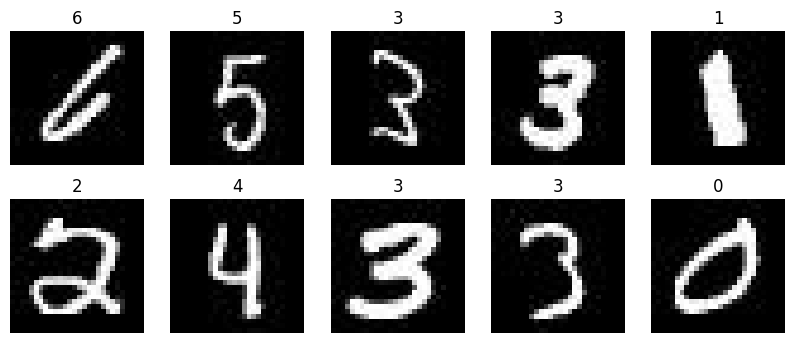

In [3]:
# Select 10 random indices
indices = np.random.choice(len(images), size=10, replace=False)

# Sanity Check: Plot the images and their labels
plot = plt.figure(figsize=(10, 4))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[index].reshape(28, 28), cmap="gray")
    plt.title(str(target[index]))
    plt.axis("off")
plt.show()

In [4]:
# Shuffle the data
train_size: int = int(0.8 * images.shape[0])

shuffle_indices = np.random.permutation(np.arange(images.shape[0]))
images = images[shuffle_indices]
target = target[shuffle_indices]

# Split the data into training and testing
x_train = images[:train_size]
y_train = target[:train_size]
x_test = images[train_size:]
y_test = target[train_size:]

In [5]:
# Fit the training data into 5, 25, and 125 dimensions
trainer = PCA(x_train)
x_train5 = trainer.fit(5)
x_train25 = trainer.fit(25)
x_train125 = trainer.fit(125)
print("Transformed Training Data in 5, 25, and 125 dimensions")

# Fit the testing data into 5, 25, and 125 dimensions
tester = PCA(x_test)
x_test5 = tester.fit(5)
x_test25 = tester.fit(25)
x_test125 = tester.fit(125)
print("Transformed Testing Data in 5, 25, and 125 dimensions")

Transformed Training Data in 5, 25, and 125 dimensions
Transformed Testing Data in 5, 25, and 125 dimensions


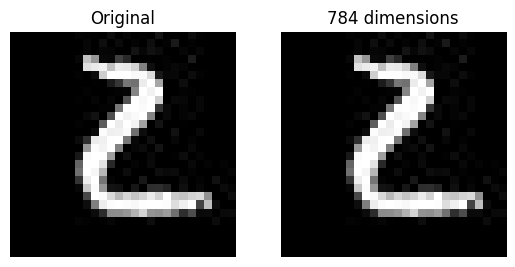

In [6]:
# Check if the PCA is functioning correctly
x_train784 = trainer.fit(784)
num = np.random.randint(0, x_train.shape[0])

plt.subplot(1, 2, 1)
plt.imshow(x_train[num].reshape(28, 28), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(x_train784[num].reshape(28, 28), cmap="gray")
plt.title("784 dimensions")
plt.axis("off")

plt.show()

In [7]:
k: int = 10

# Use k-NN to classify the images in 784, 5, 25, and 125 dimensions
knn = KNN(k)

In [8]:
print("TESTING ON ORIGINAL DATA")
knn.fit(x_train, y_train)
y_pred = knn.test(x_test, y_test)
print("FINAL SCORE:", knn.accuracy(y_test, y_pred))

TESTING ON ORIGINAL DATA
Test Sample: 8400 Accuracy: 96.29761904761905 %
FINAL SCORE: 0.9629761904761904


In [9]:
print("TESTING ON 5 DIMENSIONS")
knn.fit(x_train5, y_train)
y_pred5 = knn.test(x_test5, y_test)
print("FINAL SCORE:", knn.accuracy(y_test, y_pred5))

TESTING ON 5 DIMENSIONS
Test Sample: 8400 Accuracy: 75.63095238095238 %
FINAL SCORE: 0.7563095238095238


In [10]:
print("TESTING ON 25 DIMENSIONS")
knn.fit(x_train25, y_train)
y_pred25 = knn.test(x_test25, y_test)
print("FINAL SCORE:", knn.accuracy(y_test, y_pred25))

TESTING ON 25 DIMENSIONS
Test Sample: 8400 Accuracy: 94.5952380952381 %%
FINAL SCORE: 0.945952380952381


In [11]:
print("TESTING ON 125 DIMENSIONS")
knn.fit(x_train125, y_train)
y_pred125 = knn.test(x_test125, y_test)
print("FINAL SCORE:", knn.accuracy(y_test, y_pred125))

TESTING ON 125 DIMENSIONS
Test Sample: 8400 Accuracy: 96.92857142857143 %
FINAL SCORE: 0.9692857142857143


Number of Principal Components required to explain at least 80% Variance: 185


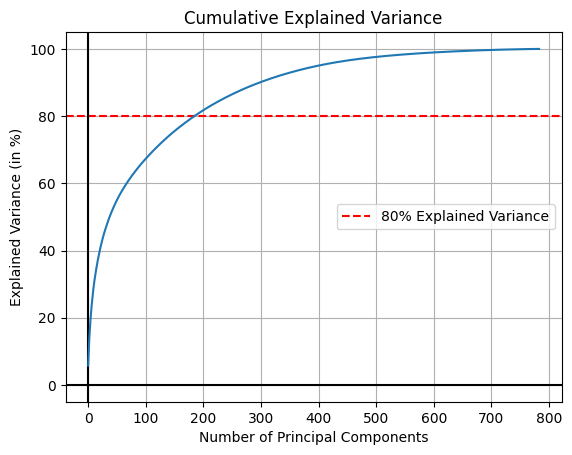

In [12]:
# PLotting Explained Variance

cumulative_explained_variance = trainer.cumulative_explained_variance() * 100
count = 0
while cumulative_explained_variance[count] < 80:
    count += 1
print("Number of Principal Components required to explain at least 80% Variance:", count)

plt.axhline(y=80, color="red", linewidth=1.5, linestyle="--", label=r"80% Explained Variance")
plt.axhline(y=0.0, color="black", linewidth=1.5)
plt.axvline(x=0.0, color="black", linewidth=1.5)
plt.plot(cumulative_explained_variance)

plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance (in %)")
plt.legend()
plt.grid(True)
plt.show()